In [101]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
#loading the data 
df=pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [103]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


***Data Preprocessing***

from the above things, now we have to remove the Name, Cabin, Ticket these three factors are not even effecting the survivals

In [105]:
#Removing the unwanted columns
df=df.drop(columns=['Name','Cabin','Ticket'], axis=1)

In [106]:
#checking for null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [107]:
#filling the Age, by age median values
#filling Embarked nan with S
df['Age']=df['Age'].replace(np.nan, df['Age'].median(axis=0))
df['Embarked']=df['Embarked'].replace(np.nan, 'S')

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


Now the data is cleaned and there are no nuull values, just now we replaced the null-values

In [109]:
#checking the data types of data 
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

i.Here Sex is in Object/String we have to change it to int and changing male as 1, female as 0

ii.Age is in float dtype, i want to chage it to int dtype

In [110]:
# changing the values male as 1 and female as 0

df['Sex']=df['Sex'].apply(lambda x:0 if x=='female' else 1)

In [111]:
#changing the Age from float to int
df['Age']=df['Age'].astype(int)
df['Sex']=df['Sex'].astype(int)
df['Survived']=df['Survived'].astype(int)
df['Fare']=df['Fare'].astype(int)

C:\Users\navin\AppData\Local\Temp\ipykernel_13060\3395443366.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, ax=ax[0,0],palette='husl')
C:\Users\navin\AppData\Local\Temp\ipykernel_13060\3395443366.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=df, ax=ax[0,1],palette='husl')
C:\Users\navin\AppData\Local\Temp\ipykernel_13060\3395443366.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=df, ax=ax[0,2],palette='husl')
C:\Users\navin\AppData\Local\Temp\ipykernel_13060\339544336

<Axes: xlabel='Embarked', ylabel='count'>

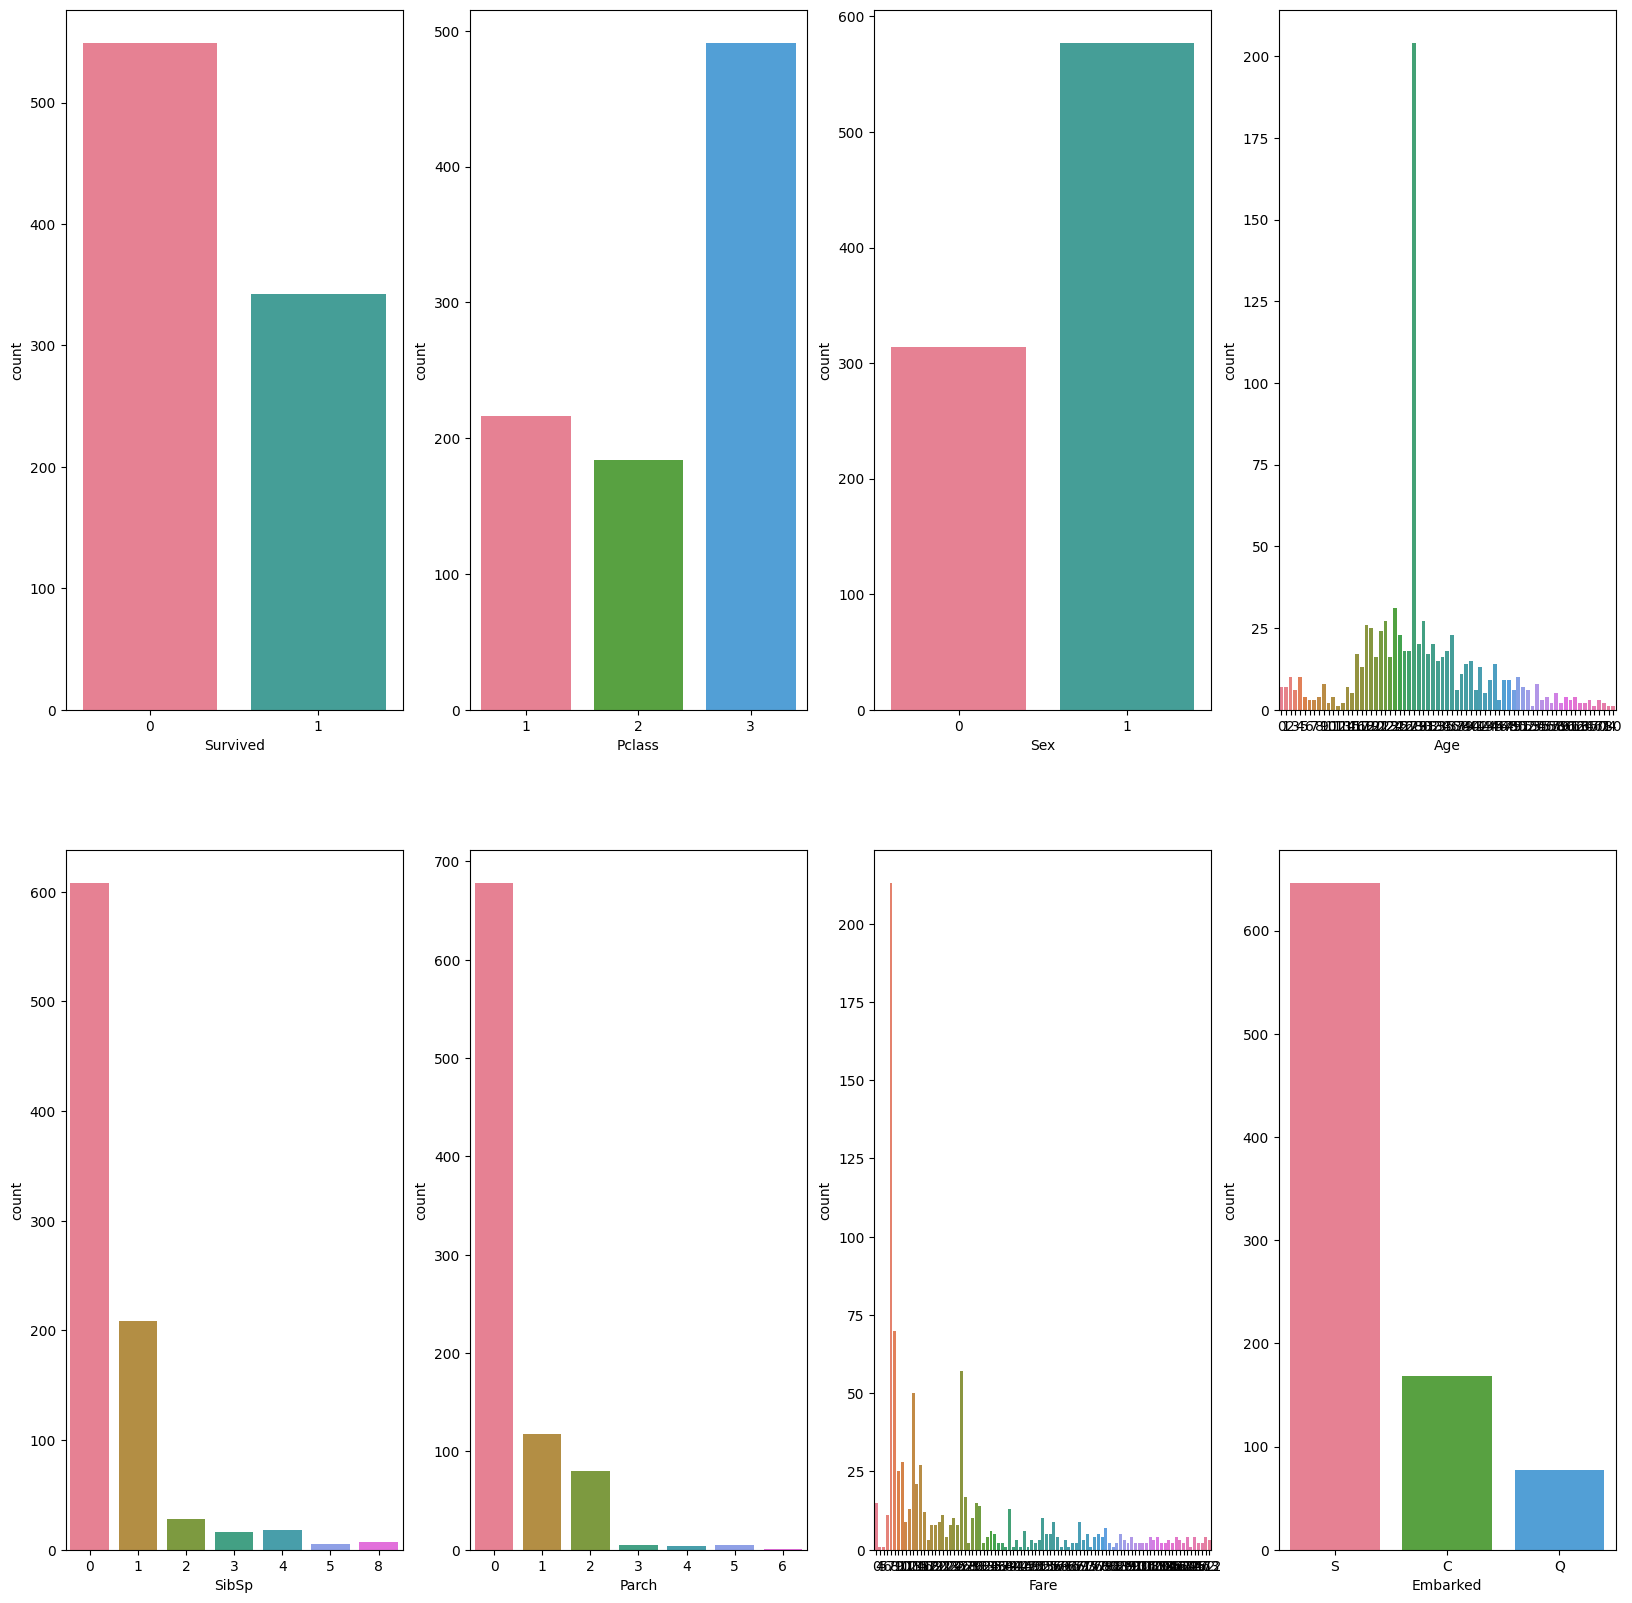

In [112]:
#plotting the counntplots to visualize the numbers in columns

fig,ax=plt.subplots(2,4,figsize=(20,20))
sns.countplot(x='Survived', data=df, ax=ax[0,0],palette='husl')
sns.countplot(x='Pclass', data=df, ax=ax[0,1],palette='husl')
sns.countplot(x='Sex', data=df, ax=ax[0,2],palette='husl')
sns.countplot(x='Age', data=df, ax=ax[0,3],palette='husl')
sns.countplot(x='SibSp', data=df, ax=ax[1,0],palette='husl')
sns.countplot(x='Parch', data=df, ax=ax[1,1],palette='husl')
sns.countplot(x='Fare', data=df, ax=ax[1,2],palette='husl')
sns.countplot(x='Embarked', data=df, ax=ax[1,3],palette='husl')

<Axes: xlabel='Pclass', ylabel='Survived'>

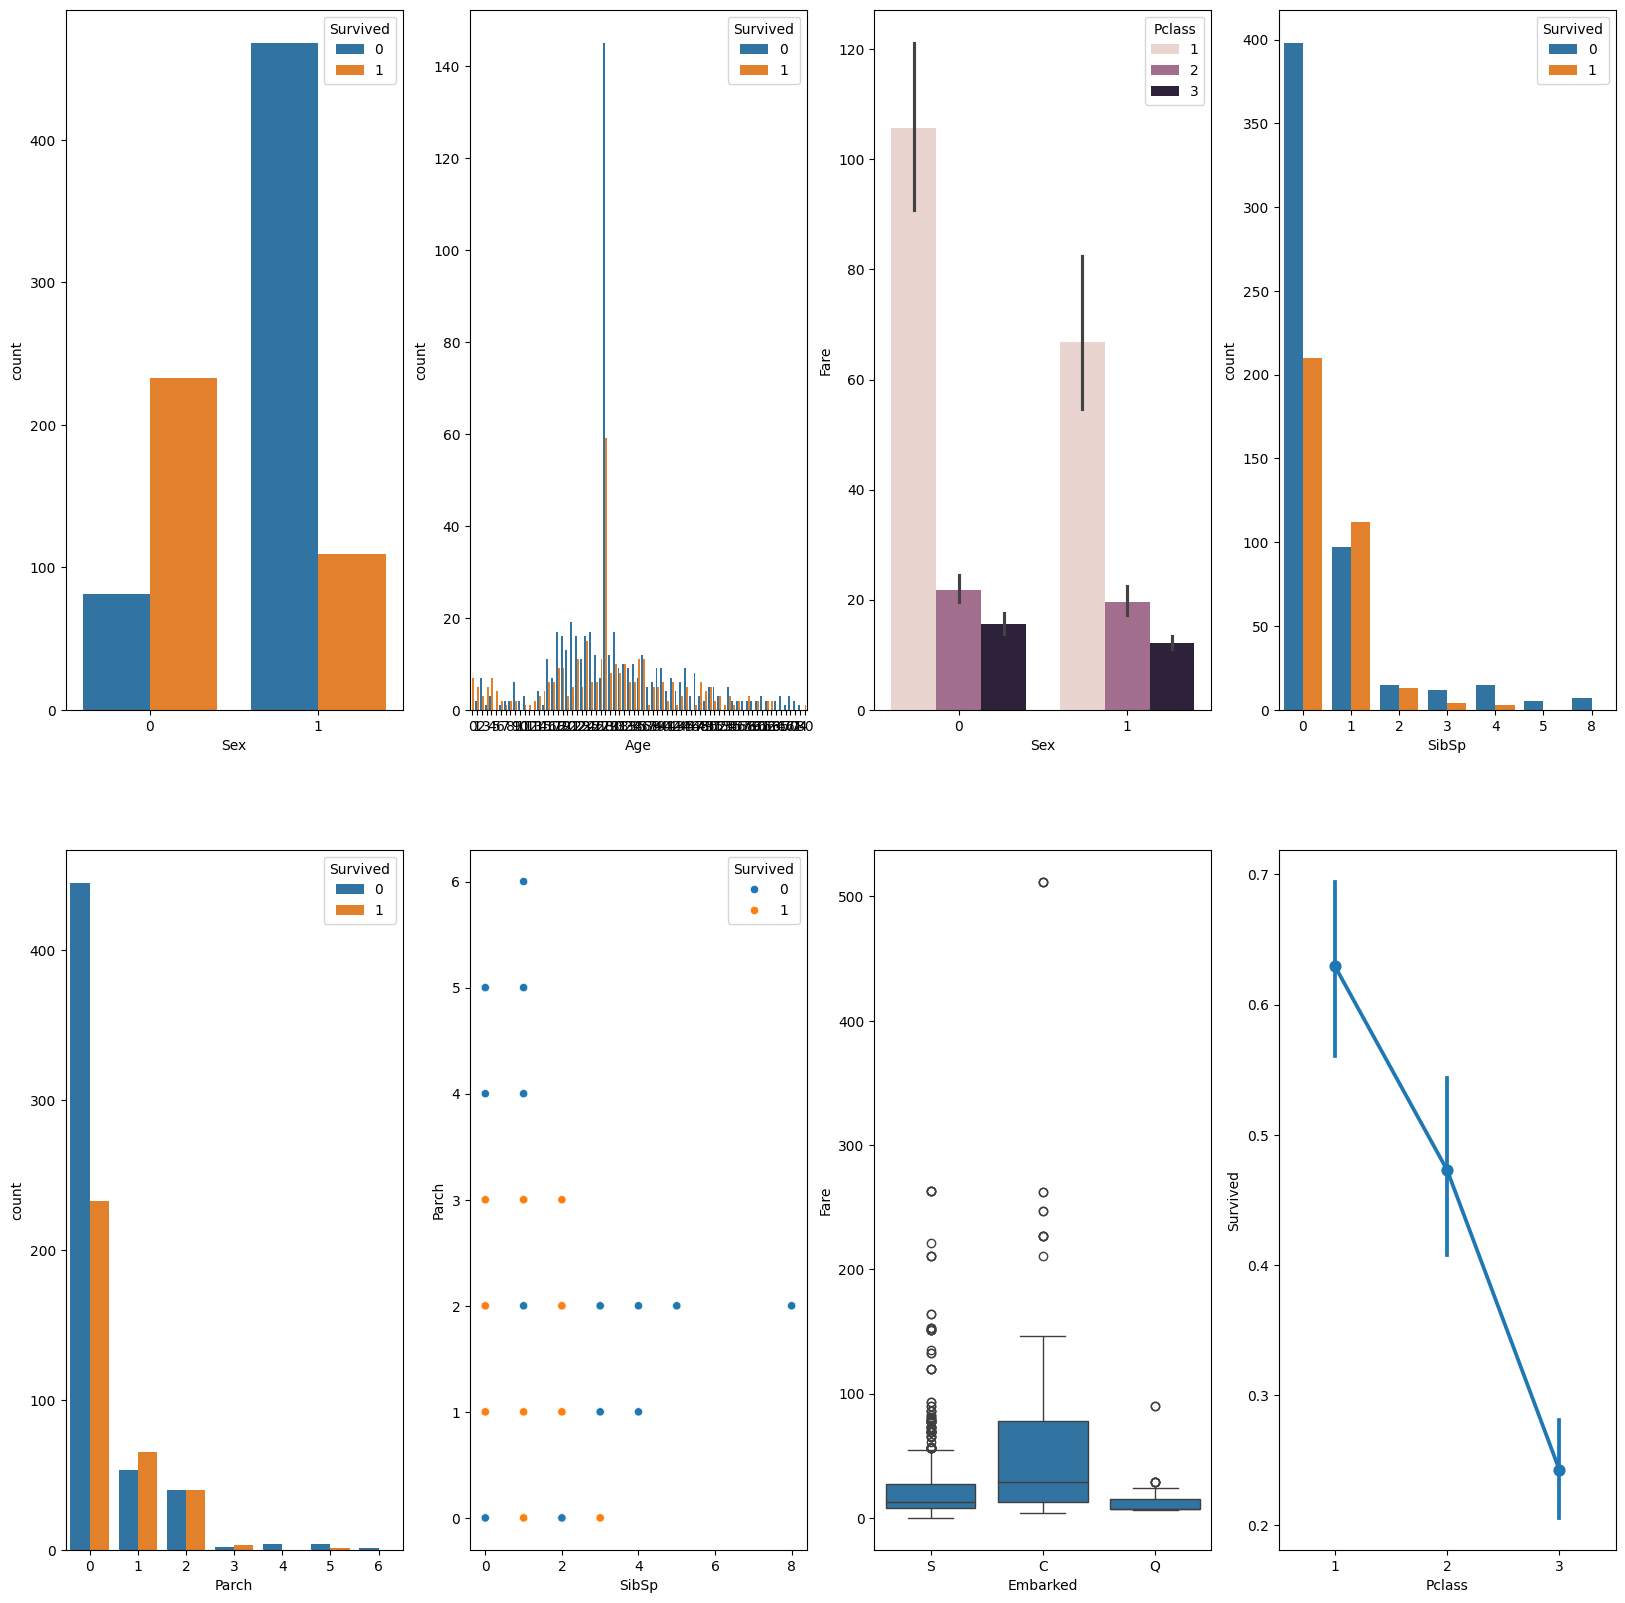

In [113]:
#Visualizing the Relationships between them 

fig, ax=plt.subplots(2,4,figsize=(20,20))
sns.countplot(x='Sex', data=df, hue='Survived', ax=ax[0,0])
sns.countplot(x='Age', data=df, hue='Survived', ax=ax[0,1])
sns.barplot(x='Sex',y='Fare', data=df, hue='Pclass', ax=ax[0,2])
sns.countplot(x='SibSp', data=df, hue='Survived', ax=ax[0,3])
sns.countplot(x='Parch', data=df, hue='Survived', ax=ax[1,0])
sns.scatterplot(x='SibSp', y='Parch', data=df, hue='Survived', ax=ax[1,1])
sns.boxplot(x='Embarked', y='Fare', data=df, ax=ax[1,2])
sns.pointplot(x='Pclass', y="Survived", data=df, ax=ax[1,3])


In [114]:
#Embarked values are assigned as 0,1,2,

from sklearn import preprocessing
l=preprocessing.LabelEncoder()
l.fit(['S','C','Q'])
df['Embarked']=l.transform(df['Embarked'])

<Axes: >

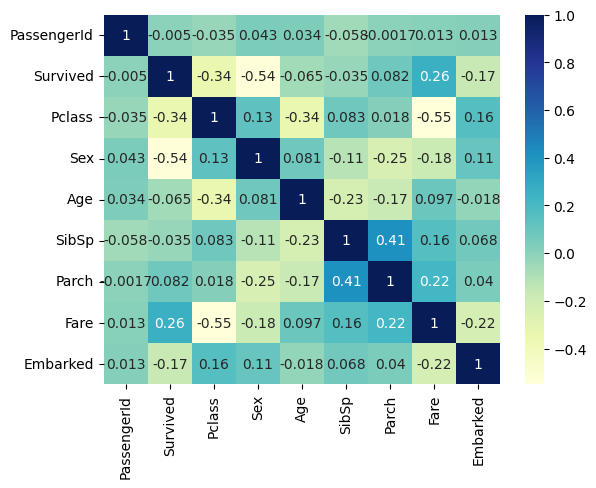

In [115]:
#correlation between the factors
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')

***Separating the Target and Independent Variables***

In [116]:
#splitting the test and train sets from main data
x=df['Survived'].values
y=df.drop(columns=['Survived']).values

***Training the Model***

In [117]:
#importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [118]:
#Logistic Regression

lr=LogisticRegression()
lr.fit(y,x)
lr.score(y,x)

C:\Users\navin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8035914702581369

In [119]:
#Decision Tree Classifiers

from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(y,x)
dt.score(y,x)

1.0

In [120]:
#Suport Vector Machine

from sklearn.svm import SVC
svm=SVC()
svm.fit(y,x)
svm.score(y,x)

0.6644219977553311

In [121]:
#K-Nearest neighbor

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(y,x)
knn.score(y,x)

0.7575757575757576

From the above regression analysis, i found that Decision Tree Classifier is making 100% accuracy, so we can procede with DecisionTreeClassifier

***Importing Test Data Set***

In [122]:
#Loading the testing dataset

dft=pd.read_csv('tesT.csv')
dft

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [123]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [124]:
#removing the unwanted columns

dft=dft.drop(columns=['Name','Cabin','Ticket'], axis=1)

In [125]:
#replacing the null values of age column with median of age

dft['Age']=dft['Age'].replace(np.nan, dft['Age'].median(axis=0))
dft['Embarked']=dft['Embarked'].replace(np.nan, 'S')

In [126]:
# changing the values male as 1 and female as 0

dft['Sex']=dft['Sex'].apply(lambda x:0 if x=='female' else 1)

In [127]:
#filling the null values with 0

dft=dft.fillna(method='ffill')

C:\Users\navin\AppData\Local\Temp\ipykernel_13060\600216674.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dft=dft.fillna(method='ffill')


In [128]:
#changing the Age from float to int

dft['Age']=dft['Age'].astype(int)
dft['Sex']=dft['Sex'].astype(int)
dft['Fare']=dft['Fare'].astype(int)

In [129]:
#predicting the final values of survivals
pred=dt.predict(y)
pred

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [130]:
#creating a new datset, from the test data set we are using passergerId 
#using the Series of prediction values we are creating Survived column
#club these two clumns and saving them in new dataset 

final=pd.DataFrame(dft['PassengerId'])
final['Survived']=pd.Series(pred)
final.to_csv('predictions.csv', index=False)
final

,PassengerId,Survived
0,892,0
1,893,1
2,894,1
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,1
